In [2]:
import numpy as np
import sympy as sp
import math
from matplotlib import pyplot as plt

In [35]:
def left_endpoint_sum(f,a,b,n):
  d = (b-a) / n
  sum = 0
  for i in range(0,n):
    sum += f(a + i*d)
  return d*sum

In [36]:
def right_endpoint_sum(f,a,b,n):
  d = (b-a) / n
  sum = 0
  for i in range(1,n+1):
    sum += f(a + i*d)
  return d*sum

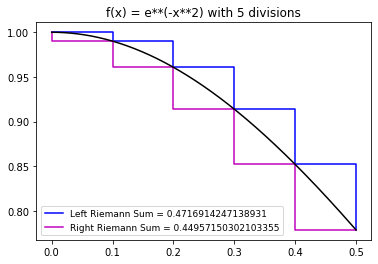

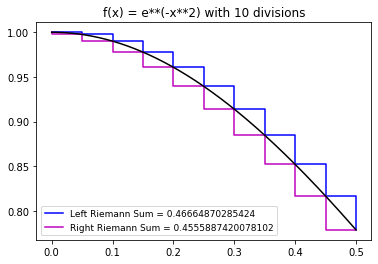

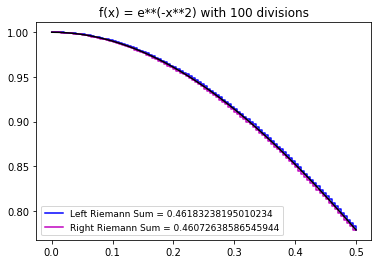

In [43]:
x = sp.symbols('x') 
f = lambda x : math.e**(-1*x**2)

LRS5 = left_endpoint_sum(f, 0, 0.5, 5) #Left Riemann Sum with 5 intervals
RRS5 = right_endpoint_sum(f, 0, 0.5, 5) #Right Riemann Sum with 5 intervals
LRS10 = left_endpoint_sum(f, 0, 0.5, 10)
RRS10 = right_endpoint_sum(f, 0, 0.5, 10)
LRS100 = left_endpoint_sum(f, 0, 0.5, 100)
RRS100 = right_endpoint_sum(f, 0, 0.5, 100)

xfunc = np.linspace(0,0.5,1001)
x5 = np.linspace(0,0.5,6)
x10 = np.linspace(0,0.5,11)
x100 = np.linspace(0,0.5,101)

yfunc = f(xfunc)
y5 = f(x5)
y10 = f(x10)
y100 = f(x100)

plt.step(x5, y5, 'b', where="post", label="Left Riemann Sum = " + str(LRS5))
plt.step(x5, y5, 'm', where="pre", label="Right Riemann Sum = " + str(RRS5))
plt.plot(xfunc,yfunc, 'k')
plt.title("f(x) = e**(-x**2) with 5 divisions")
plt.legend(fontsize=9)
plt.show()

plt.step(x10, y10, 'b', where="post", label="Left Riemann Sum = " + str(LRS10))
plt.step(x10, y10, 'm', where="pre", label="Right Riemann Sum = " + str(RRS10))
plt.plot(xfunc,yfunc, 'k')
plt.title("f(x) = e**(-x**2) with 10 divisions")
plt.legend(fontsize=9)
plt.show()

plt.step(x100, y100, 'b', where="post", label="Left Riemann Sum = " + str(LRS100))
plt.step(x100, y100, 'm', where="pre", label="Right Riemann Sum = " + str(RRS100))
plt.plot(xfunc,yfunc, 'k')
plt.title("f(x) = e**(-x**2) with 100 divisions")
plt.legend(fontsize=9)
plt.show()

#The Lefthand Riemann Sum is an overestimate
#The Righthand Riemann Sum is an underestimate

In [47]:
def midpoint_sum(f,a,b,n):
  d = (b-a) / n
  sum = 0
  for i in range(0, n):
    sum += f(a + i*d + d/2)
  return d*sum

In [52]:
def trapezoid_sum(f,a,b,n):
  d = (b-a) / n
  sum = 0
  for i in range(0, n+1):
    if i == 0:
      sum += f(a)
    elif i == n:
      sum += f(b)
    else:
      sum += 2*f(a + i*d)
  return 0.5*d*sum
#The Trapezoidal Sum of n partitions is equal to
#the average of the Left and Right Riemann Sums

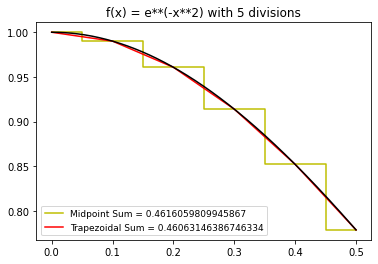

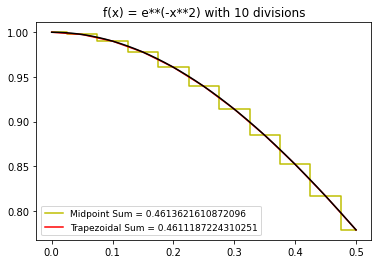

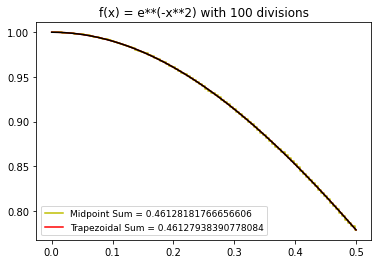

In [53]:
x = sp.symbols('x') 
f = lambda x : math.e**(-1*x**2)

MPS5 = midpoint_sum(f, 0, 0.5, 5) #Midpoint Sum with 5 intervals
TPS5 = trapezoid_sum(f, 0, 0.5, 5) #Trapezoidal Sum with 5 intervals
MPS10 = midpoint_sum(f, 0, 0.5, 10)
TPS10 = trapezoid_sum(f, 0, 0.5, 10)
MPS100 = midpoint_sum(f, 0, 0.5, 100)
TPS100 = trapezoid_sum(f, 0, 0.5, 100)

xfunc = np.linspace(0,0.5,1001)
x5 = np.linspace(0,0.5,6)
x10 = np.linspace(0,0.5,11)
x100 = np.linspace(0,0.5,101)

yfunc = f(xfunc)
y5 = f(x5)
y10 = f(x10)
y100 = f(x100)

plt.step(x5, y5, 'y', where="mid", label="Midpoint Sum = " + str(MPS5))
plt.plot(x5, y5, 'r', label="Trapezoidal Sum = " + str(TPS5))
plt.plot(xfunc,yfunc, 'k')
plt.title("f(x) = e**(-x**2) with 5 divisions")
plt.legend(fontsize=9)
plt.show()

plt.step(x10, y10, 'y', where="mid", label="Midpoint Sum = " + str(MPS10))
plt.plot(x10, y10, 'r', label="Trapezoidal Sum = " + str(TPS10))
plt.plot(xfunc,yfunc, 'k')
plt.title("f(x) = e**(-x**2) with 10 divisions")
plt.legend(fontsize=9)
plt.show()

plt.step(x100, y100, 'y', where="mid", label="Midpoint Sum = " + str(MPS100))
plt.plot(x100, y100, 'r', label="Trapezoidal Sum = " + str(TPS100))
plt.plot(xfunc,yfunc, 'k')
plt.title("f(x) = e**(-x**2) with 100 divisions")
plt.legend(fontsize=9)
plt.show()

#The Trapezoidal sum is an underestimate
#The Midpoint sum is an overestimate

In [55]:
def simpsons_rule_sum(f,a,b,n):
  assert n % 2 == 0, "n must be even"
  d = (b-a) / n
  sum = 0
  for i in range(0,n+1):
    if i == 0:
      sum += f(a)
    elif i == n:
      sum += f(b)
    elif i % 2 == 0:
      sum += 2*f(a + i*d)
    else:
      sum += 4*f(a + i*d)
  return (1/3)*d*sum

#The Simpsons Rule Sum of n partitions is equal to
#the average of the Left and Right Riemann Sums and
#four time the Midpoint Sum
#Sn = ((b-a)/n)*(1/3)*sum(f(a + ((b-a)*i)/n) + 4f(a + ((b-a)*(i+1)/n) + f(a + ((b-a)*(i+2)/n)))
#for i in range(0,n-2,1)

In [56]:
x = sp.symbols('x') 
f = lambda x : math.e**(-1*x**2)

SRS10 = simpsons_rule_sum(f, 0, 0.5, 10) #Simpsons Rule Sum with 10 intervals
SRS100 = simpsons_rule_sum(f, 0, 0.5, 100)
print(SRS10)
print(SRS100)

0.4612811419522122
0.4612810064263137


In [59]:
Approximations = []
Approximations += [("LRS5",LRS5), ("LRS10",LRS10), ("LRS100",LRS100)]
Approximations += [("RRS5",RRS5), ("RRS10",RRS10), ("RRS100",RRS100)]
Approximations += [("MPS5",MPS5), ("MPS10",MPS10), ("MPS100",MPS100)]
Approximations += [("TPS5",TPS5), ("TPS10",TPS10), ("TPS100",TPS100)]
Approximations += [("SRS10",SRS10), ("SRS100",SRS100)]
Approximations.sort(key = lambda y : y[1])
print(Approximations)

[('RRS5', 0.44957150302103355), ('RRS10', 0.4555887420078102), ('TPS5', 0.46063146386746334), ('RRS100', 0.46072638586545944), ('TPS10', 0.4611187224310251), ('TPS100', 0.46127938390778084), ('SRS100', 0.4612810064263137), ('SRS10', 0.4612811419522122), ('MPS100', 0.46128181766656606), ('MPS10', 0.4613621610872096), ('MPS5', 0.4616059809945867), ('LRS100', 0.46183238195010234), ('LRS10', 0.46664870285424), ('LRS5', 0.4716914247138931)]


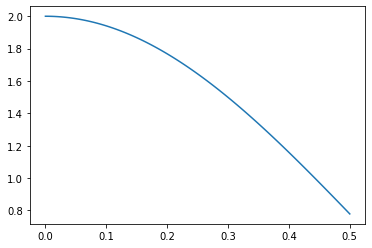

(0.4609103890976918, 0.4613270557643584)
(0.46125799442054294, 0.4614663277538763)
(0.46128110722999, 0.4612811766744344)


In [62]:
x = sp.symbols('x')
f = lambda x : math.e**(-1*x**2)
fppmag = lambda x : abs(4*x**2 * math.e**(-1*x**2) - 2*math.e**(-1*x**2))
xtest = np.linspace(0,0.5,101)
ytest = fppmag(xtest)
plt.plot(xtest,ytest)
plt.show()
#From the plot we can see the max of |f"(x)| is at x = 0
K = fppmag(0)

def midpoint_errorf(k,a,b,n):
  return (k*(b-a)**3) / (24*n**2)
def trapezoid_errorf(k,a,b,n):
  return (k*(b-a)**3) / (12*n**2)
def simpsons_errorf(k,a,b,n):
  return (k*(b-a)**5) / (180*n**4)

T10 = trapezoid_errorf(K,0,0.5,10)
M10 = midpoint_errorf(K,0,0.5,10)
S10 = simpsons_errorf(K,0,0.5,10)

Trange = (TPS10 - T10, TPS10 + T10)
Mrange = (MPS10 - M10, MPS10 + M10)
Srange = (SRS10 - S10, SRS10 + S10)

print(Trange) #T10
print(Mrange) #M10
print(Srange) #S10

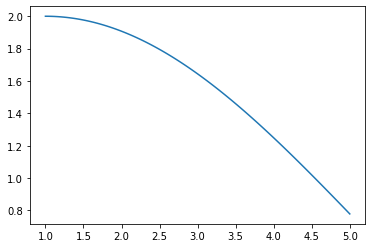

(1.7820390106296689, 1.7820390106296689)
(1.7820390106296689, 1.7820390106296689)
(1.515372343963002, 1.7287056772963354)
(1.5498773448773449, 1.6565440115440113)
(1.6089452163084468, 1.6112207718640021)
0.17260109819556857
0.17260109819556857
0.012601098195568428
-0.006227234223422196
0.0006450816521241798


In [64]:
x = sp.symbols('x')
f = lambda x : 1/x
L10 = left_endpoint_sum(f,1,5,10)
R10 = left_endpoint_sum(f,1,5,10)
T10 = trapezoid_sum(f,1,5,10)
M10 = midpoint_sum(f,1,5,10)
S10 = simpsons_rule_sum(f,1,5,10)

fppmag = lambda x : abs(2/(x**3))
xtest = np.linspace(1,5,101)
yest = fppmag(xtest)
plt.plot(xtest,ytest)
plt.show()

K = fppmag(1)
LE = L10-R10
RE = L10-R10
TE = trapezoid_errorf(K,1,5,10)
ME = midpoint_errorf(K,1,5,10)
SE = simpsons_errorf(K,1,5,10)

Lrange = (L10-LE,L10+LE)
Rrange = (R10-RE,R10+RE)
Trange = (T10-TE,T10+TE)
Mrange = (M10-ME,M10+ME)
Srange = (S10-SE,S10+SE)

print(Lrange)
print(Rrange)
print(Trange)
print(Mrange)
print(Srange)

LET = L10 - math.log(5)
RET = R10 - math.log(5)
TET = T10 - math.log(5)
MET = M10 - math.log(5)
SET = S10 - math.log(5)

print(LET) #True lefthand error
print(RET) #True righthand error
print(TET) #True trapezoidal error
print(MET) #True midpoint error
print(SET) #True simpsons error